# Anaysis of Healthy Lifestyle Cities Report 2021

By Mahitha Potti

*About*: This dataset 'Healthy Lifestyle Cities Report 2021' is obtained from kaggle. It consists of 10 healthy living metrics in top 44 cities.

*Mission*: The main aim is to find relationships between various factors that lead to healthy or unhealthy lifestyle in cities and visualize them.

*Limitations of the data*: This dataset consists of only 44 cities and the dataset is very small. So the observations are insufficient to give powerful estimations.

#### Import packages and load the csv file into DataFrame format

In [301]:
import numpy as np
import pandas as pd

In [302]:
data=pd.read_csv("C:\\Users\\User\\Desktop\\healthy_lifestyle_city_2021.csv")

To know the basic information of the dataset and understand the columns:

In [303]:
data.info()
data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   City                                    44 non-null     object 
 1   Rank                                    44 non-null     int64  
 2   Sunshine hours(City)                    44 non-null     object 
 3   Cost of a bottle of water(City)         44 non-null     object 
 4   Obesity levels(Country)                 44 non-null     object 
 5   Life expectancy(years) (Country)        44 non-null     float64
 6   Pollution(Index score) (City)           44 non-null     object 
 7   Annual avg. hours worked                44 non-null     object 
 8   Happiness levels(Country)               44 non-null     float64
 9   Outdoor activities(City)                44 non-null     int64  
 10  Number of take out places(City)         44 non-null     int64  


(44, 12)

In [304]:
data.head()

,City,Rank,Sunshine hours(City),Cost of a bottle of water(City),Obesity levels(Country),Life expectancy(years) (Country),Pollution(Index score) (City),Annual avg. hours worked,Happiness levels(Country),Outdoor activities(City),Number of take out places(City),Cost of a monthly gym membership(City)
0,Amsterdam,1,1858,£1.92,20.40%,81.2,30.93,1434,7.44,422,1048,£34.90
1,Sydney,2,2636,£1.48,29.00%,82.1,26.86,1712,7.22,406,1103,£41.66
2,Vienna,3,1884,£1.94,20.10%,81.0,17.33,1501,7.29,132,1008,£25.74
3,Stockholm,4,1821,£1.72,20.60%,81.8,19.63,1452,7.35,129,598,£37.31
4,Copenhagen,5,1630,£2.19,19.70%,79.8,21.24,1380,7.64,154,523,£32.53


### Cleaning the Dataset

In [305]:
data.isnull().any()

City                                      False
Rank                                      False
Sunshine hours(City)                      False
Cost of a bottle of water(City)           False
Obesity levels(Country)                   False
Life expectancy(years) (Country)          False
Pollution(Index score) (City)             False
Annual avg. hours worked                  False
Happiness levels(Country)                 False
Outdoor activities(City)                  False
Number of take out places(City)           False
Cost of a monthly gym membership(City)    False
dtype: bool

In [306]:
data.isna().any()

City                                      False
Rank                                      False
Sunshine hours(City)                      False
Cost of a bottle of water(City)           False
Obesity levels(Country)                   False
Life expectancy(years) (Country)          False
Pollution(Index score) (City)             False
Annual avg. hours worked                  False
Happiness levels(Country)                 False
Outdoor activities(City)                  False
Number of take out places(City)           False
Cost of a monthly gym membership(City)    False
dtype: bool

Looks like the data does not contain any null or empty values. Let us check for duplicate data rows among the dataset

In [307]:
data.duplicated().any()

False

The data seems to be pretty clean and consistant.

In [308]:
#Remove blank spaces with .strip()
data['City'] = data['City'].str.strip()

In [309]:
data.head()

,City,Rank,Sunshine hours(City),Cost of a bottle of water(City),Obesity levels(Country),Life expectancy(years) (Country),Pollution(Index score) (City),Annual avg. hours worked,Happiness levels(Country),Outdoor activities(City),Number of take out places(City),Cost of a monthly gym membership(City)
0,Amsterdam,1,1858,£1.92,20.40%,81.2,30.93,1434,7.44,422,1048,£34.90
1,Sydney,2,2636,£1.48,29.00%,82.1,26.86,1712,7.22,406,1103,£41.66
2,Vienna,3,1884,£1.94,20.10%,81.0,17.33,1501,7.29,132,1008,£25.74
3,Stockholm,4,1821,£1.72,20.60%,81.8,19.63,1452,7.35,129,598,£37.31
4,Copenhagen,5,1630,£2.19,19.70%,79.8,21.24,1380,7.64,154,523,£32.53


### Prepare the data for analysis

There seems to be series in this dataframe which are not in correspondance with their data types. Let us change the data types of some series.

In [310]:
data['Pollution(Index score) (City)'] = pd.to_numeric(data['Pollution(Index score) (City)'],errors = 'coerce')
data['Annual avg. hours worked'] = pd.to_numeric(data['Annual avg. hours worked'],errors = 'coerce')
data['Sunshine hours(City)'] = pd.to_numeric(data['Sunshine hours(City)'],errors = 'coerce')
data['Cost of a monthly gym membership(City)'] = pd.to_numeric(data['Cost of a monthly gym membership(City)'],errors = 'coerce')
data['Obesity levels(Country)'] = data['Obesity levels(Country)'].astype(str)
data['Obesity levels(Country)'] = data['Obesity levels(Country)'].str.rstrip('%').astype('float')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   City                                    44 non-null     object 
 1   Rank                                    44 non-null     int64  
 2   Sunshine hours(City)                    43 non-null     float64
 3   Cost of a bottle of water(City)         44 non-null     object 
 4   Obesity levels(Country)                 44 non-null     float64
 5   Life expectancy(years) (Country)        44 non-null     float64
 6   Pollution(Index score) (City)           43 non-null     float64
 7   Annual avg. hours worked                33 non-null     float64
 8   Happiness levels(Country)               44 non-null     float64
 9   Outdoor activities(City)                44 non-null     int64  
 10  Number of take out places(City)         44 non-null     int64  


In [311]:
data=data.drop(columns=['Cost of a bottle of water(City)'])

### Analyze the data

let us check for correlations in the data

In [312]:
data.corr()

,Rank,Sunshine hours(City),Obesity levels(Country),Life expectancy(years) (Country),Pollution(Index score) (City),Annual avg. hours worked,Happiness levels(Country),Outdoor activities(City),Number of take out places(City),Cost of a monthly gym membership(City)
Rank,1.000000,0.007940,0.197486,-0.320034,0.427297,0.498113,-0.231970,-0.076972,0.363058,NaN
Sunshine hours(City),0.007940,1.000000,0.281304,-0.356351,0.393847,0.560260,-0.334141,0.129550,-0.211848,NaN
Obesity levels(Country),0.197486,0.281304,1.000000,0.091071,-0.256251,0.265088,0.446399,0.150171,0.016833,NaN
Life expectancy(years) (Country),-0.320034,-0.356351,0.091071,1.000000,-0.558713,-0.480859,0.724587,-0.044864,0.128163,NaN
Pollution(Index score) (City),0.427297,0.393847,-0.256251,-0.558713,1.000000,0.544704,-0.765902,0.242622,0.187227,NaN
Annual avg. hours worked,0.498113,0.560260,0.265088,-0.480859,0.544704,1.000000,-0.531554,0.083404,-0.035817,NaN
Happiness levels(Country),-0.231970,-0.334141,0.446399,0.724587,-0.765902,-0.531554,1.000000,-0.137612,0.033116,NaN
Outdoor activities(City),-0.076972,0.129550,0.150171,-0.044864,0.242622,0.083404,-0.137612,1.000000,0.528200,NaN
Number of take out places(City),0.363058,-0.211848,0.016833,0.128163,0.187227,-0.035817,0.033116,0.528200,1.000000,NaN
Cost of a monthly gym membership(City),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


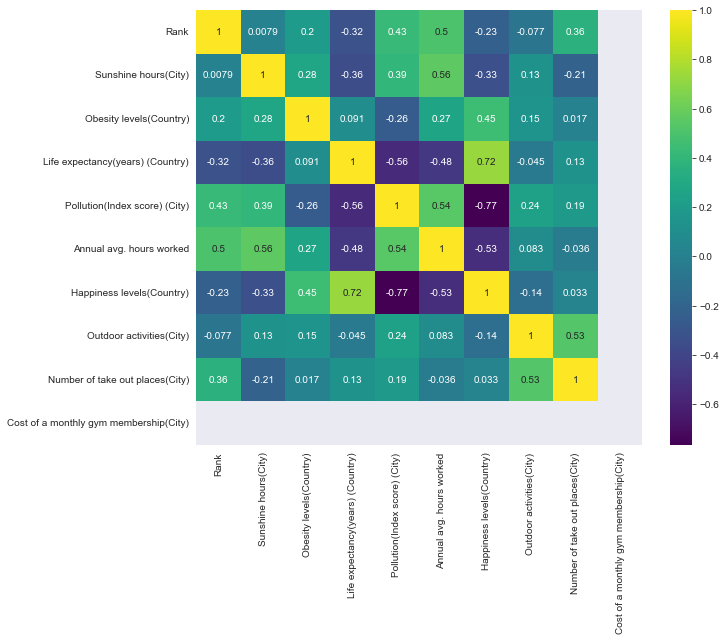

In [313]:
corr = data.corr()

sns.heatmap(corr,xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap='viridis')
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

In [314]:
data['Happiness levels(Country)'].describe()

count    44.000000
mean      6.435000
std       0.991202
min       3.570000
25%       5.870000
50%       6.900000
75%       7.175000
max       7.800000
Name: Happiness levels(Country), dtype: float64

The maximum happiness level is 7.8, while the minimum is only 3.57.
Let us see the relationships between happiness levels and different factors to find out correlations among the data.

But before that, import the necessary packages needed to visualize the correlations.

In [315]:
import matplotlib.pyplot as plt
import seaborn as sns

#### Relation between the number of hours of sunlight, happiness levels and life expectancy

<AxesSubplot:xlabel='Happiness levels(Country)', ylabel='Annual avg. hours worked'>

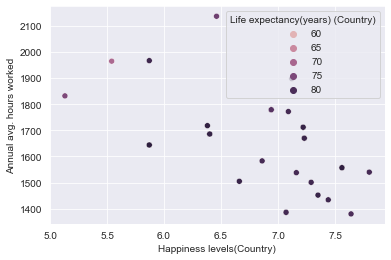

In [316]:
g=sns.scatterplot(data=data,x='Happiness levels(Country)',y='Annual avg. hours worked',hue="Life expectancy(years) (Country)",
                  )
g

This scatterplot shows that as the average number of hours worked decreased, the happiness levels and the life expectancy rates have also increased.

#### Relation between life expectancy and pollution levels

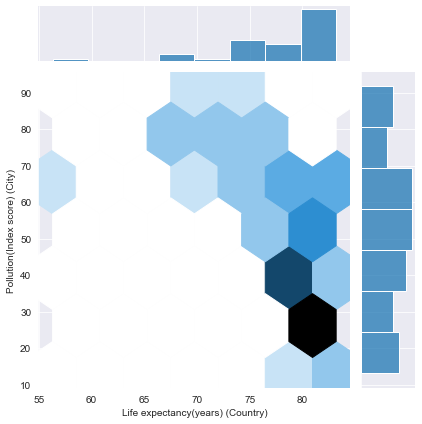

In [317]:
a=sns.jointplot(data=data, x='Life expectancy(years) (Country)',y='Pollution(Index score) (City)',kind='hex')

The plot clearly shows that the low pollution levels lead to higher life expectancy rates.

<AxesSubplot:xlabel='Pollution(Index score) (City)', ylabel='Happiness levels(Country)'>

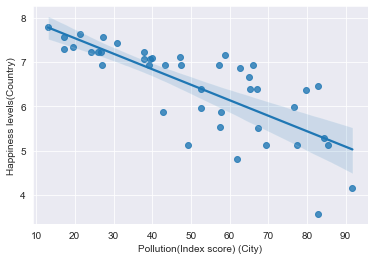

In [318]:
sns.regplot(x='Pollution(Index score) (City)', y='Happiness levels(Country)', data=data)

If the city has lower pollution levels Happiness level is higher.

#### Relation between happiness levels and Life expectancy

Text(0.5, 1.0, 'Relation between Happiness levels and Life expectancy')

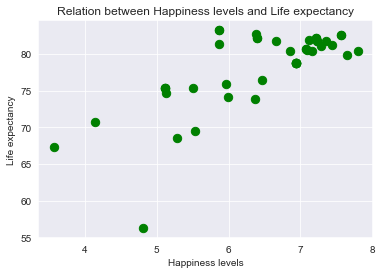

In [319]:
plt.scatter(data["Happiness levels(Country)"],data['Life expectancy(years) (Country)'],c="g",s=70)
plt.xlabel("Happiness levels");
plt.ylabel("Life expectancy");
plt.title("Relation between Happiness levels and Life expectancy")

There is a clear indication that higher levels of happiness leads to higher life expectancy

In [320]:
data['Obesity levels(Country)'].describe()

count    44.00000
mean     21.92500
std      10.19567
min       3.90000
25%      19.50000
50%      22.30000
75%      29.00000
max      36.20000
Name: Obesity levels(Country), dtype: float64

I will create a new series in the dataframe called 'Obesity range' to have cateogorical data of obesity.

In [321]:
obesity=[]
for a in data['Obesity levels(Country)']:
    if a>=10 and a<20:
        obesity.append('Low')
    elif a>=20 and a<30:
        obesity.append('Moderately high')
    else:
        obesity.append('High')

In [322]:
data['Obesity range']=pd.Series(obesity)

#### Relation between obesity and the number of takeout places in a city

Text(0.5, 1.0, 'Relation between obesity and number of take out places in a city')

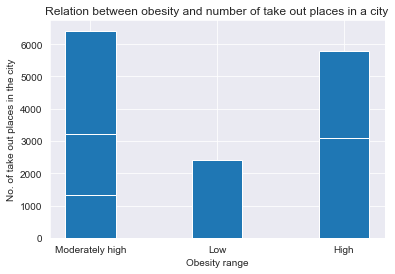

In [323]:
plt.bar(data['Obesity range'], data['Number of take out places(City)'],
        width = 0.4)
 
plt.xlabel("Obesity range")
plt.ylabel("No. of take out places in the city")
plt.title("Relation between obesity and number of take out places in a city")

The plot clearly shows that obesity levels are high when there are too many takeout places in the city

In [324]:
data[['Number of take out places(City)','Happiness levels(Country)']].corr()

,Number of take out places(City),Happiness levels(Country)
Number of take out places(City),1.000000,0.033116
Happiness levels(Country),0.033116,1.000000


But also, there is a positive correlation between the number of takeout places in a city and the happiness levels

### Conclusion

In conclusion, there are many factors that relate to happiness levels and overall healthy lifestyle of people ina  city. The insights confirmed are:

-A major factor behind longer life expectancy is happiness.Higher levels of happiness leads to higher life expectancy rates.

-Obesity is a major concern of people's health. It is higher in cities with mor takeout places

-But people are also happier in cities with more take out places.

-As the average number of hours worked decreased, the happiness levels and the life expectancy rates have also increased.

-Low pollution levels lead to higher life expectancy rates, which also correlated to higher happiness levels